In [10]:
import pandas as pd
from sklearn import cluster
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# load the data
df_3 = pd.read_csv('../Data/cluster_ds3.csv')
df_4 = pd.read_csv('../Data/cluster_ds4.csv')
df_5 = pd.read_csv('../Data/cluster_ds5.csv')

# 1. Exploratory data analysis

### 1.1 Duplicates


In [3]:
# check duplication for ds3 
check_duplication_3 = df_3.duplicated()
duplicated_3 = df_3[check_duplication_3]
print(duplicated_3)

Empty DataFrame
Columns: [x, y, class]
Index: []


In [4]:
# check duplication for ds4
check_duplication_4 = df_4.duplicated()
duplicated_4 = df_4[check_duplication_4]
print(duplicated_4)

Empty DataFrame
Columns: [x, y, class]
Index: []


In [5]:
# check duplication for ds5
check_duplication_5 = df_5.duplicated()
duplicated_5 = df_5[check_duplication_5]
print(duplicated_5)

Empty DataFrame
Columns: [x, y, class]
Index: []


### 1.2 Outliers detection

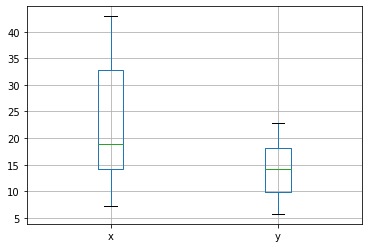

In [6]:
# check outliers for ds3
df_3.drop(['class'],axis=1).boxplot()

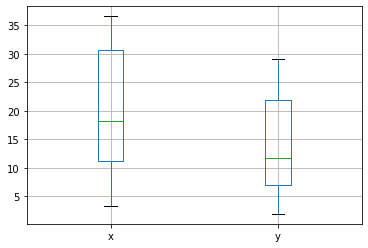

In [7]:
df_4.drop(['class'],axis=1).boxplot()

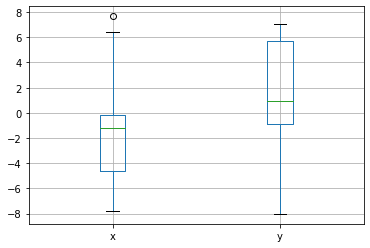

In [8]:
df_5.drop(['class'],axis=1).boxplot()

for outliers we will just keep them

### 1.3 miss values

result: no missing values

In [9]:
# check miss values for df3
empty_3 = pd.isnull(df_3)
has_miss_3 = df_3[empty_3]
print(True in has_miss_3)

False


In [10]:
# check miss values for df4
empty_4 = pd.isnull(df_4)
has_miss_4 = df_4[empty_4]
print(True in has_miss_4)

False


In [11]:
# check miss values for df5
empty_5 = pd.isnull(df_5)
has_miss_5 = df_3[empty_5]
print(True in has_miss_5)

False


### 1.4 find attribute correlation

result: correlation of the two attribute in df_3 shows there are some correlation between those attributes; for df_4 and
df_5, these is no correlation between different attributes.

Since in df_3 the correlation of the two attribute is not 1, and we only have 2 attribute in df_3, we will not take any 
of them as redundant attributes

[Text(0.5, 0, 'x'), Text(1.5, 0, 'y')]

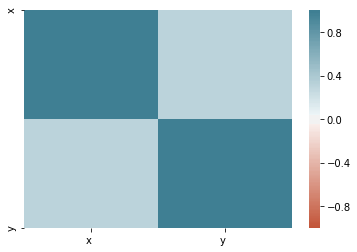

In [15]:
# correlation of df 3
corr_3 = df_3.drop(['class'], axis=1).corr()
ax = sns.heatmap(corr_3, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20,220,n=200))
ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='right')

[Text(0.5, 0, 'x'), Text(1.5, 0, 'y')]

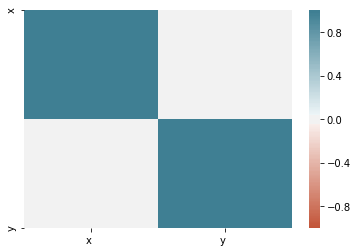

In [16]:
# correlation of df 4
corr_ = df_4.drop(['class'], axis=1).corr()
ax = sns.heatmap(corr_, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20,220,n=200))
ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='right')

[Text(0.5, 0, 'x'), Text(1.5, 0, 'y')]

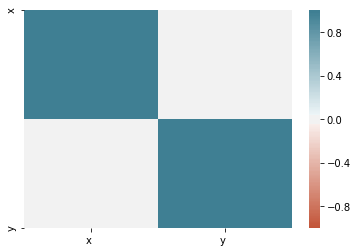

In [17]:
# correlation of df 5
corr_ = df_5.drop(['class'], axis=1).corr()
ax = sns.heatmap(corr_, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20,220,n=200))
ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='right')

### 1.5 Summary and statistics of the dataset

#### 1.5.1 df_3
as shown above, df_3 is a high quality dataset, in which there is no outliers, duplications or missing value; the range 
of these values are slightly different but not siginificantly differs form each other

as we can see from below some of the class for example class 5 and class 6 are well separated, class 3 and class 4 are 
some how separated with minor overlap; class 1 and class 2 are density based differnet clusters;
Beside class 5 and class 1 are wired shaped clusters, we might expect algorithms like Kmeans to fails on them
The size of different clusters also differs frome ach other, class 5 has the most data points and class 6 has the least 
data points.

{1, 2, 3, 4, 5, 6}


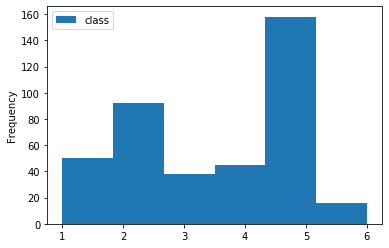

In [9]:
# df_3
print(set(df_3['class'].values))
df_3.drop(['x','y'],axis=1).plot.hist(bins=len(set(df_3['class'].values)))

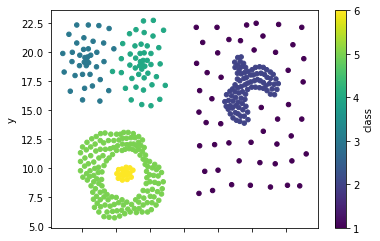

In [6]:
ax = df_3.plot.scatter(x='x',y='y',c='class', colormap='viridis')

#### 1.5.2 df_4
as shown above, df_4 is also a high quality dataset, in which there is no outliers, duplications or missing values; the 
range of vlaues of the attributes though not completely the same but highly overlaps, suggesting rescaling techiniques 
could be omitted

As we can see from the plots below, size of clusters in dataset 4 varies; this may gravely influence the performance of 
clustering algorithm, especially in the case of cluster 4,5 and 7, who are closly located clusters. Class 6 and 3 are 
linked together by a bridge, for contiguous clustering aspect they are expect to be classified into same cluster. For 
algorithm looking for globular shaped clusters like kmeans class 3 and 6 could be treat as two different clusters. 

{1, 2, 3, 4, 5, 6, 7}


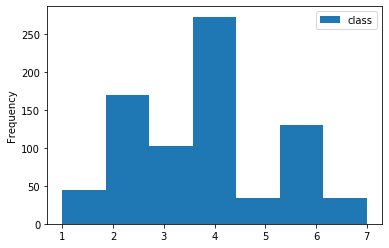

In [5]:
# df_4 scatter by class
print(set(df_4['class'].values))
df_4.drop(['x','y'],axis=1).plot.hist(bins=len(set(df_4['class'].values)))

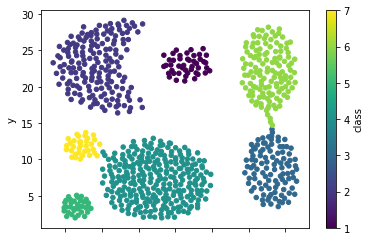

In [5]:
ax = df_4.plot.scatter(x='x',y='y',c='class', colormap='viridis')
plt.show()

#### 1.5.3 df_5
df_5, the last dataset we do clustering analysis does not contains outliers duplicates or missing value; the range of 
different values does not infers a rescaling techniques is need.

As we can see from the following plots, the different classes are even in number; but siginificantly different in 
density; overlapping amoung classes could be observed; K-means should face challenge on this dataset; Agglomerative 
clustering should not have more advantages than others; I personally think DB scan should also face some challenge 
if the hyperparameters is not tuned. On the other hand, if GMM model is applied to the dataset, I would expect GMM has
better performance then the current three

{0, 1, 2}


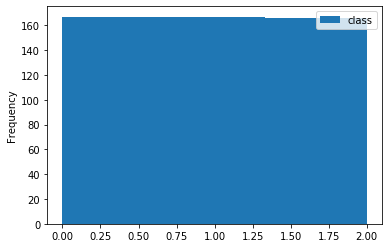

In [8]:
print(set(df_5['class'].values))
df_5.drop(['x','y'],axis=1).plot.hist(bins=3)

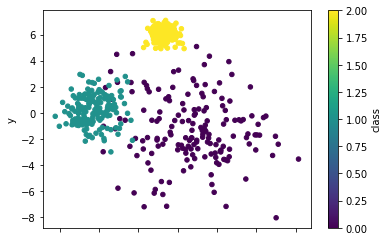

In [9]:
ax = df_5.plot.scatter(x='x',y='y',c='class', colormap='viridis')
plt.show()

## 2. Data Preprocessing
The statistics from the above section shows that there is no necessary recaling or drop of any data entry of values. On 
the other hand, I do want to try doing clustering on transformed data. Inspired by SVM with inner product kernel, 
a nonlinear transformation to six dimensional data is applie to dataset 3, since it has so many wired shaped classes. 
The non linear transformation in to higher dimensional space might process a more separable case which should allevate 
the problem; however, the original version of dataset 3 will be still kept.

The transformed data has six dimensions, listed in below
x1 = 1
x2 = x^2
x3 = sqrt(2) * x * y
x4 = y^2
x5 = sqrt(2) * x
x6 = sqrt(2) * y

In [11]:
x1 = np.float_power(df_3['x'], 0)